<a href="https://colab.research.google.com/github/bsumanthreddy/DataScientist/blob/main/attemp_2_of_Device_Failure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pylab as plt #
  import seaborn as sns

In [ ]:
!pip install lifelines


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WEEK 7/predictive_maintenance_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##df = pd.read_csv('/content/predictive_maintenance_dataset.csv')


FileNotFoundError: ignored

In [ ]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3

In [ ]:
pip install profiling

In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=62784839ec6dda6737783005ef059cdce9b8a1ec5116fff5eef86e68319a55aa
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas_profiling

<ipython-input-12-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/2015  S1F01085        0  215630672       55        0       52   
1        1/1/2015  S1F0166B        0   61370680        0        3        0   
2        1/1/2015  S1F01E6Y        0  173295968        0        0        0   
3        1/1/2015  S1F01JE0        0   79694024        0        0        0   
4        1/1/2015  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489  11/2/2015  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/2015  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/2015  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/2015  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/2015  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0             6   407438        0        0        7  
1             6   403174        0        0        0  
2            12   237394        0        0        0  
3             6   410186        0        0        0  
4            15   313173        0        0        3  
...         ...      ...      ...      ...      ...  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0    70000  

[124493 rows x 12 columns]

In [ ]:
df

date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/2015  S1F01085        0  215630672       55        0       52   
1        1/1/2015  S1F0166B        0   61370680        0        3        0   
2        1/1/2015  S1F01E6Y        0  173295968        0        0        0   
3        1/1/2015  S1F01JE0        0   79694024        0        0        0   
4        1/1/2015  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489  11/2/2015  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/2015  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/2015  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/2015  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/2015  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0             6   407438        0        0        7  
1             6   403174        0        0        0  
2            12   237394        0        0        0  
3             6   410186        0        0        0  
4            15   313173        0        0        3  
...         ...      ...      ...      ...      ...  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0    70000  

[124494 rows x 12 columns]

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
124489    False
124490    False
124491    False
124492    False
124493    False
Length: 124494, dtype: bool

In [ ]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

In [ ]:
df.shape

(124494, 12)

In [ ]:
df.dropna()

date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/2015  S1F01085        0  215630672       55        0       52   
1        1/1/2015  S1F0166B        0   61370680        0        3        0   
2        1/1/2015  S1F01E6Y        0  173295968        0        0        0   
3        1/1/2015  S1F01JE0        0   79694024        0        0        0   
4        1/1/2015  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489  11/2/2015  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/2015  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/2015  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/2015  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/2015  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0             6   407438        0        0        7  
1             6   403174        0        0        0  
2            12   237394        0        0        0  
3             6   410186        0        0        0  
4            15   313173        0        0        3  
...         ...      ...      ...      ...      ...  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0    70000  

[124494 rows x 12 columns]

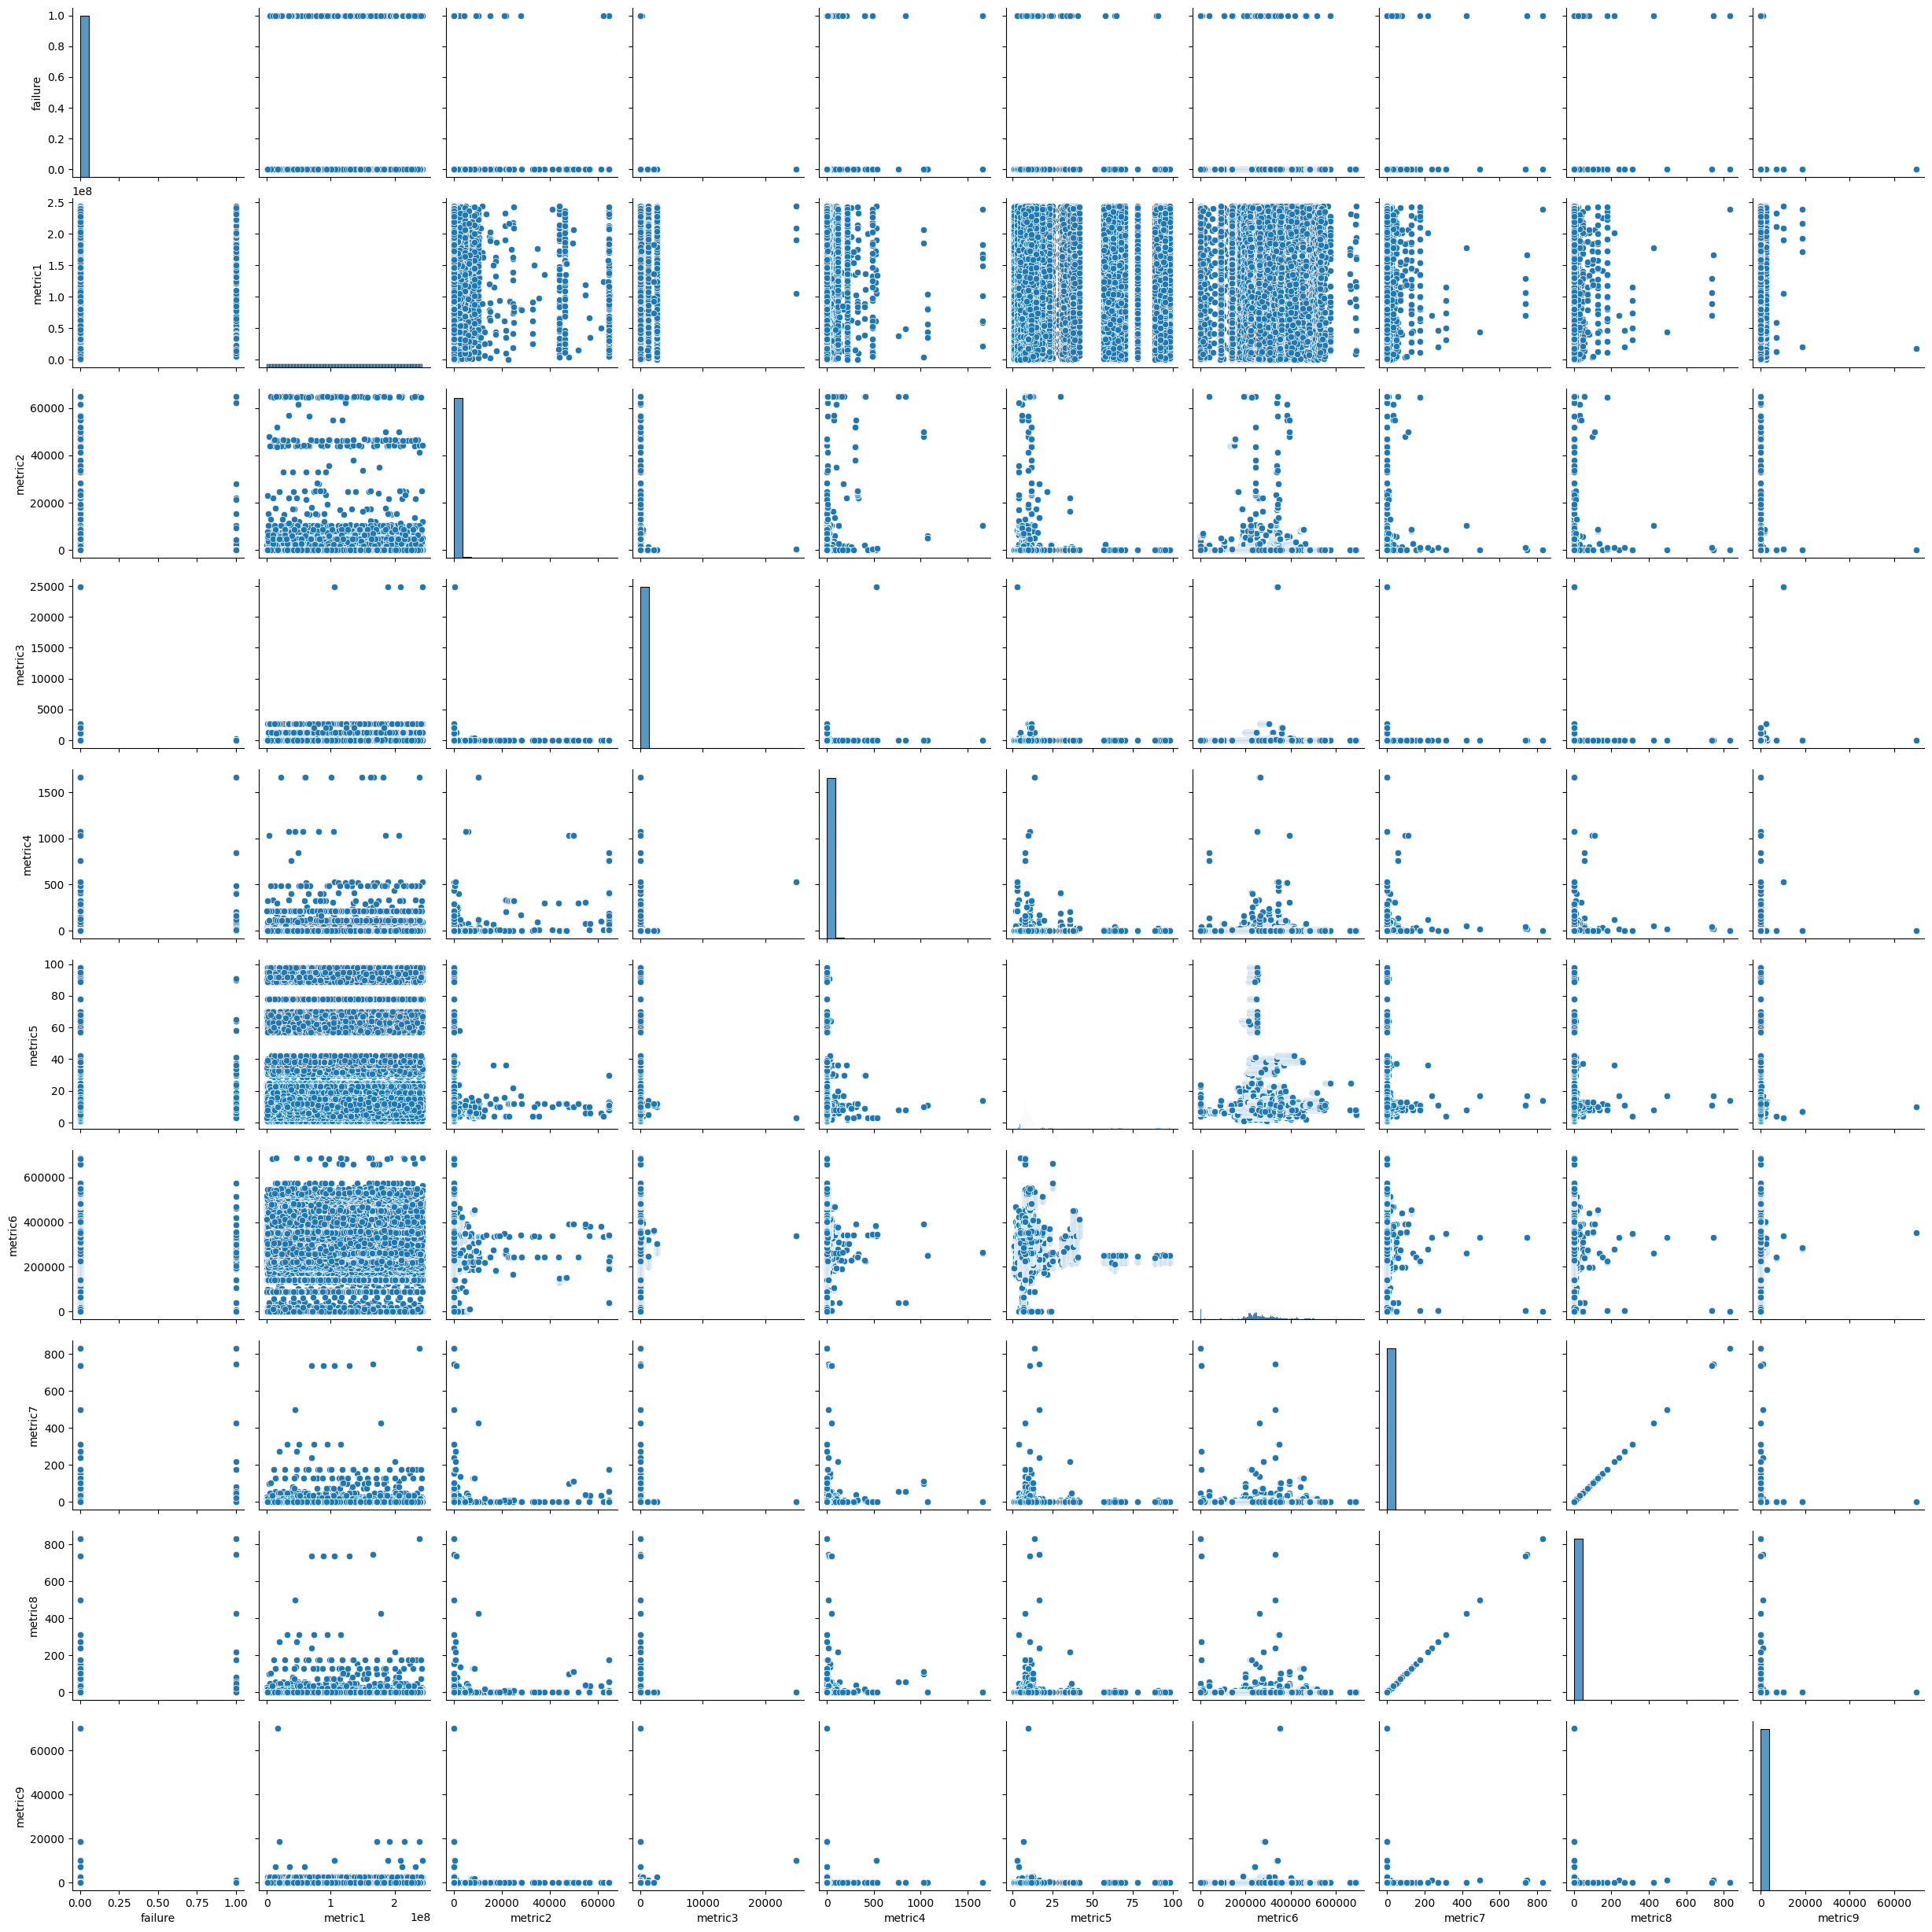

In [ ]:
sns.pairplot(df)

In [ ]:
df.isna().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


**Starting** here for modification to calculate duration


In [ ]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9 failure_str  
0   407438        0        0        7           0  
1   403174        0        0        0           0  
2   237394        0        0        0           0  
3   410186        0        0        0           0  
4   313173        0        0        3           0

In [ ]:
gb = df.groupby(['device', 'failure'])
a= gb.agg(
    metric1=('metric1', np.mean),
    metric2=('metric2', np.mean),
    metric3=('metric3', np.mean),
    metric4=('metric4', np.mean),
    metric5=('metric5', np.mean),
    metric6=('metric6', np.mean),
    metric7=('metric7', np.mean),
    metric8=('metric8', np.mean),
    metric9=('metric9', np.mean),
    first_date=('date', np.min),
    last_date=('date', np.max)
).reset_index()

In [ ]:
a['last_date']= pd.to_datetime(a['last_date'])
a['first_date'] = pd.to_datetime(a['first_date'])
a['duration'] = (a['last_date']-a['first_date']).dt.days

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test

## model fit

In [ ]:
kmf = KaplanMeierFitter()

T=a['duration']
C=a['failure'].astype(float)

kmf.fit(T,C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1275 total observations, 1169 right-censored observations>

# survival plot

<Axes: title={'center': 'Kaplan-Meier Survival Curve: Population level'}, xlabel='timeline'>

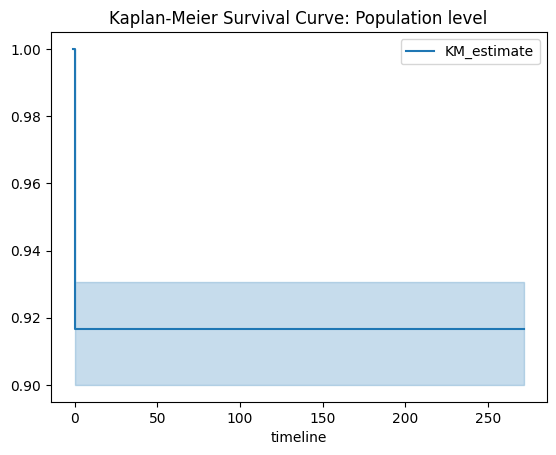

In [ ]:
kmf.plot(title='Kaplan-Meier Survival Curve: Population level')

In [ ]:
max(abs(kmf.survival_function_['KM_estimate'] - df['failure']).dropna())

0.9166011014948855

In [ ]:
ci = kmf.confidence_interval_survival_function_
ci

KM_estimate_lower_0.95  KM_estimate_upper_0.95
-1.0                  1.000000                1.000000
 0.0                  0.900009                0.930547
 2.0                  0.900009                0.930547
 3.0                  0.900009                0.930547
 4.0                  0.900009                0.930547
 5.0                  0.900009                0.930547
 6.0                  0.900009                0.930547
 7.0                  0.900009                0.930547
 8.0                  0.900009                0.930547
 31.0                 0.900009                0.930547
 33.0                 0.900009                0.930547
 34.0                 0.900009                0.930547
 38.0                 0.900009                0.930547
 39.0                 0.900009                0.930547
 61.0                 0.900009                0.930547
 62.0                 0.900009                0.930547
 67.0                 0.900009                0.930547
 81.0                 0.900009                0.930547
 91.0                 0.900009                0.930547
 94.0                 0.900009                0.930547
 95.0                 0.900009                0.930547
 96.0                 0.900009                0.930547
 97.0                 0.900009                0.930547
 98.0                 0.900009                0.930547
 122.0                0.900009                0.930547
 123.0                0.900009                0.930547
 125.0                0.900009                0.930547
 126.0                0.900009                0.930547
 127.0                0.900009                0.930547
 128.0                0.900009                0.930547
 138.0                0.900009                0.930547
 159.0                0.900009                0.930547
 187.0                0.900009                0.930547
 188.0                0.900009                0.930547
 189.0                0.900009                0.930547
 213.0                0.900009                0.930547
 214.0                0.900009                0.930547
 220.0                0.900009                0.930547
 225.0                0.900009                0.930547
 244.0                0.900009                0.930547
 251.0                0.900009                0.930547
 272.0                0.900009                0.930547

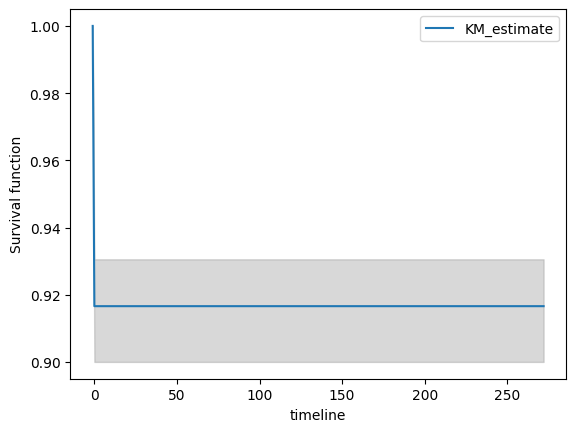

In [ ]:
ts = ci.index
low, high = np.transpose(ci.values)

plt.fill_between(ts, low, high, color='gray', alpha=0.3)
kmf.survival_function_.plot(ax=plt.gca())
plt.ylabel('Survival function');

In [ ]:
What is Kaplan-Meier outcomes?
The Kaplan-Meier (KM) method is used to analyze 'time-to-event' data.
The outcome in KM analysis often includes all-cause mortality, but could also include other outcomes such as
 the occurrence of a cardiovascular event

In [ ]:
##

IF YOU ARE GIVING MATRICS IT WILL GIVE TIME ESTIMATE UNTIL WHEN IT WILL SURVIEW.. IN NUMBER OF DAYS...